In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
os.listdir("data")

np.random.seed(1337)

def quantile_loss(y_actual, y_predict):
    """
    Cost function to minimise
    - y_actual: the actual number of core hours consumed by the simulation (array-like)
    - y_predict: the model's prediction (array-like of same length as above)
    - returns positive number, the lower the better
    """
    quantile = 0.9
    errors = np.maximum((y_actual - y_predict) * quantile, (y_predict - y_actual) * (1.0 - quantile))
    return np.mean(errors)

In [2]:
df = pd.read_csv("data/emod3d_train_x.csv")
y = pd.read_csv("data/emod3d_train_y.csv").core_hours
xtrain, xtest, ytrain, ytest = train_test_split(df, y)
test_x = pd.read_csv("data/emod3d_test_x.csv")

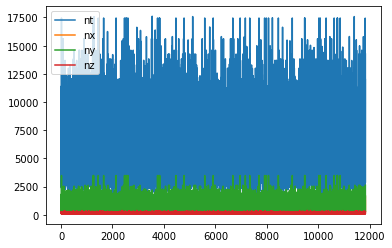

In [3]:
df[["nt", "nx", "ny", "nz"]].plot()

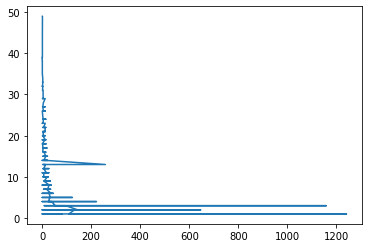

In [4]:
y.value_counts().plot()

In [5]:
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [6]:
pred = model.predict(xtest)
quantile_loss(ytest, pred)

1.6947452025250167

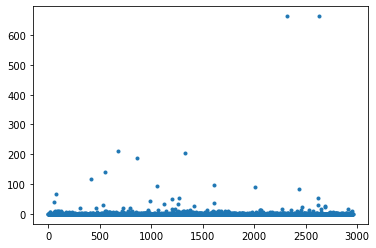

In [7]:
quantile = 0.9
errors = np.maximum((ytest - pred) * quantile, (pred - ytest) * (1.0 - quantile))
plt.scatter(range(len(pred)), errors, marker='.')

In [8]:
test_pred = model.predict(test_x)
np.savetxt("emod3d_test_y.csv", test_pred, fmt='%s')
!head "emod3d_test_y.csv"

15.247972008725679
326.84281426841454
86.8062222222222
124.4217694741213
435.01767034655757
21.571754872750766
22.02390717397887
4.843466899167413
0.7106492063492063
33.23605246947402
